# Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [5]:
df = pd.read_csv('../data/goodreads_train.csv')

In [6]:
df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


## How many books in dataset?

In [8]:
print(f"Number of unique books: {df['book_id'].nunique()}")

Number of unique books: 25474


## How many users?

In [9]:
print(f"Number of unique users: {df['user_id'].nunique()}")

Number of unique users: 12188


## How many reviews?

In [10]:
print(f"Number of reviews: {df.shape[0]}")

Number of reviews: 900000


## Number of reviews per book?

Text(0, 0.5, 'Number of reviews')

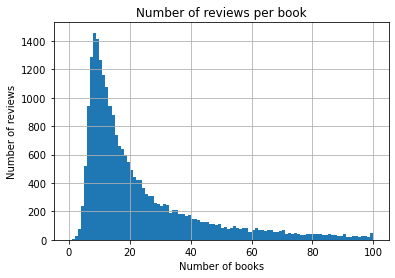

In [20]:
df['book_id'].value_counts().hist(bins=100, range=(0, 100)) # ensure binning of 1-to-1
plt.title('Number of reviews per book')
plt.xlabel('Number of books')
plt.ylabel('Number of reviews')

## How many reviews per user?

Text(0, 0.5, 'Number of reviews')

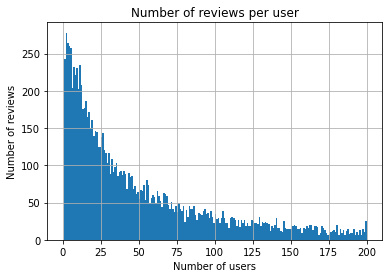

In [23]:
df['user_id'].value_counts().hist(bins=200, range=(0, 200))
plt.title('Number of reviews per user')
plt.xlabel('Number of users')
plt.ylabel('Number of reviews')

## Distribution of ratings

Text(0, 0.5, 'Percentage of reviews')

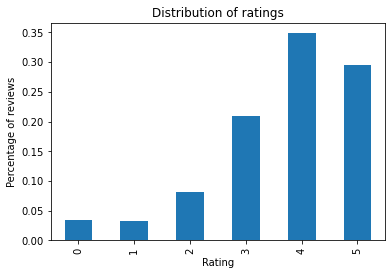

In [24]:
df['rating'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Percentage of reviews')

## Wordclouds for different review ratings

In [67]:
# Generate some example word clouds
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [76]:
def generate_wordcloud(text: str, title: str) -> None:
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=STOPWORDS, collocations=True, min_word_length=4).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()


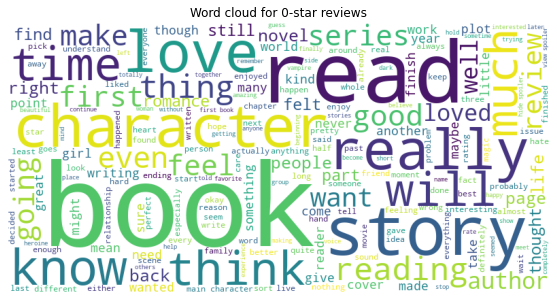

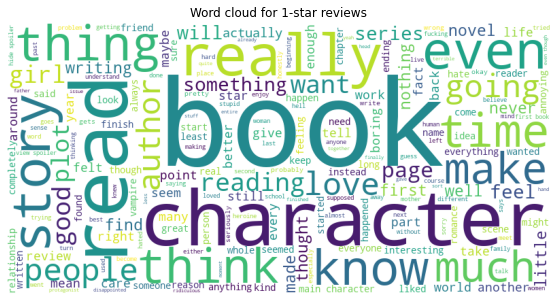

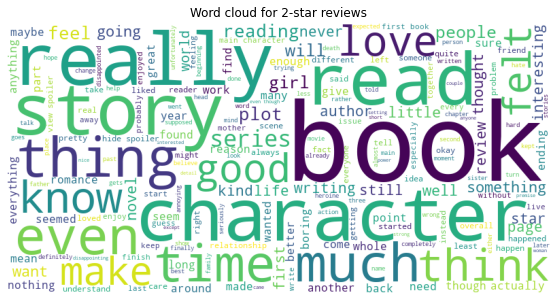

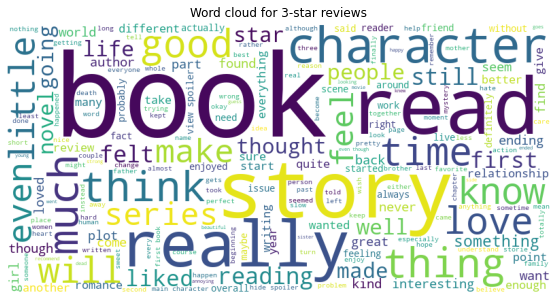

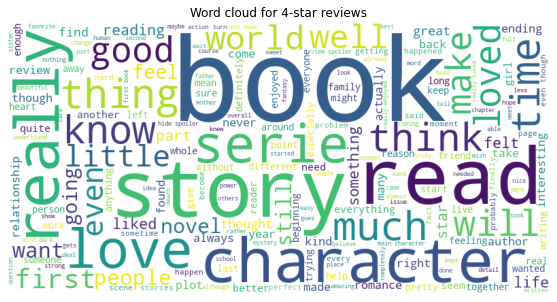

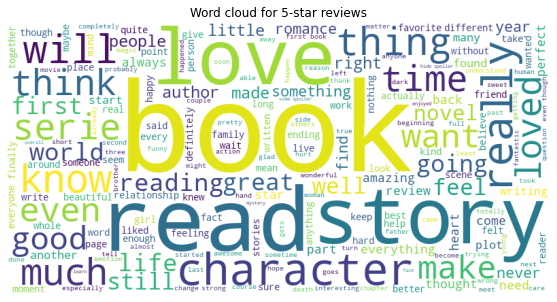

In [77]:
# Generate word cloud for randomly selected 0/1/2/3/4/5-star reviews
for i in range(6):
    text = ' '.join(df[df['rating'] == i]['review_text'].sample(1000)).lower()
    generate_wordcloud(text, f'Word cloud for {i}-star reviews')